In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import pickle
import json

#### 1.Problem Solving

indepndent Variable >> GRE, TOEFL, SOP, LOR, Chance of admit

dependent Variable >> CGPA

#### 2.Data Gathering

In [2]:
add_df = pd.read_csv('Admission_Predict.csv')
add_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
ad_df = add_df.drop(['Serial No.','Research'],axis=1)
ad_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0.82
396,325,107,3,3.0,3.5,9.11,0.84
397,330,116,4,5.0,4.5,9.45,0.91
398,312,103,3,3.5,4.0,8.78,0.67


In [24]:
ad_df["Chance of Admit "].max()

0.97

#### 3. EDA : Exploratory Data Analysis

In [5]:
ad_df.shape

(400, 7)

In [6]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 22.0 KB


In [7]:
ad_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,0.970000


In [8]:
ad_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance of Admit '],
      dtype='object')

###### 3.1 GRE Score

In [9]:
ad_df['GRE Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

In [10]:
ad_df['GRE Score'].nunique()

49

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

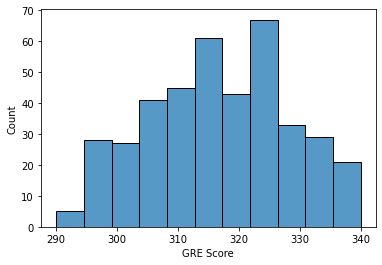

In [11]:
sns.histplot(ad_df['GRE Score'])

<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

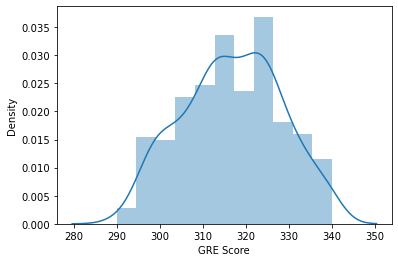

In [12]:
sns.distplot(ad_df['GRE Score'])

<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

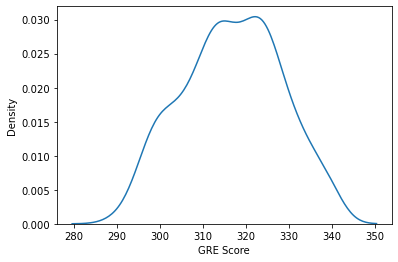

In [13]:
sns.kdeplot(ad_df['GRE Score'])

<AxesSubplot:xlabel='GRE Score', ylabel='count'>

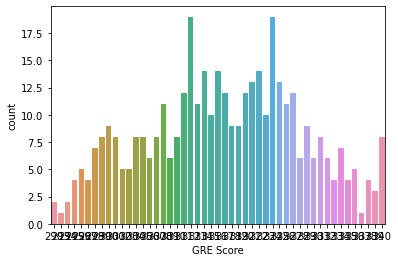

In [14]:
sns.countplot(ad_df['GRE Score'])

###### 3.2 TOEFL Score

<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

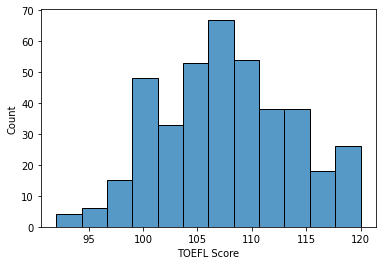

In [15]:
sns.histplot(ad_df['TOEFL Score'])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

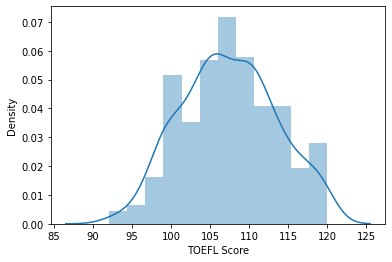

In [16]:
sns.distplot(ad_df['TOEFL Score'])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

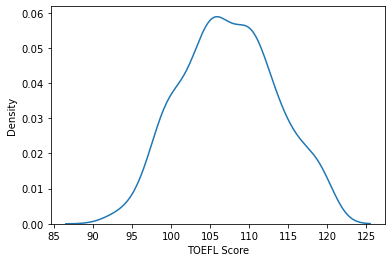

In [17]:
sns.kdeplot(ad_df['TOEFL Score'])

<AxesSubplot:xlabel='TOEFL Score', ylabel='count'>

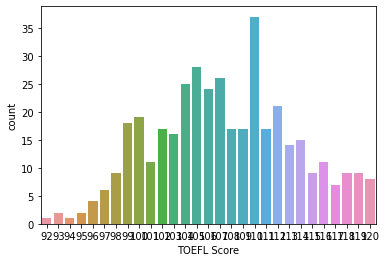

In [18]:
sns.countplot(ad_df['TOEFL Score'])

###### 3.3 University Rating

<AxesSubplot:xlabel='University Rating', ylabel='Count'>

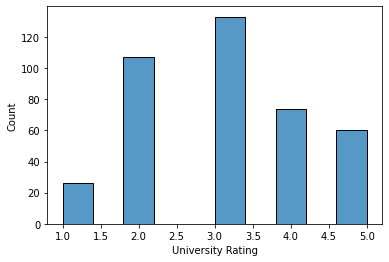

In [19]:
sns.histplot(ad_df['University Rating'])

<AxesSubplot:xlabel='University Rating', ylabel='Density'>

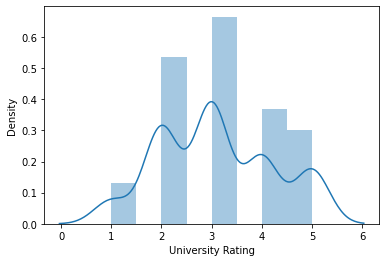

In [20]:
sns.distplot(ad_df['University Rating'])

<AxesSubplot:xlabel='University Rating', ylabel='Density'>

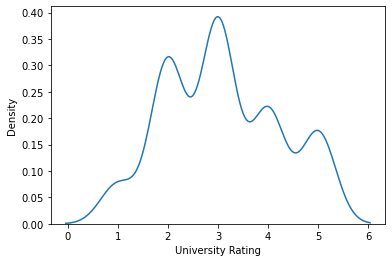

In [21]:
sns.kdeplot(ad_df['University Rating'])

<AxesSubplot:xlabel='University Rating', ylabel='count'>

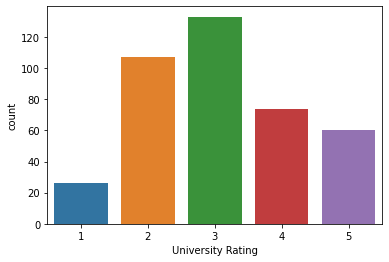

In [22]:
sns.countplot(ad_df['University Rating'])

<AxesSubplot:>

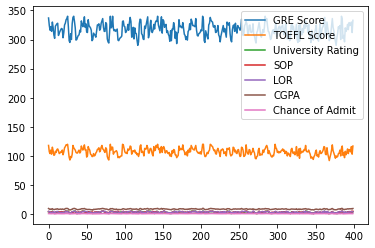

In [23]:
ad_df.plot()

#### 4. Feature Engineering


#### 5. Feature Selection


##### 5.1.Linearity

In [24]:
ad_df.cov()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
GRE Score,131.644555,58.216967,8.778791,7.079699,5.747726,5.699742,1.313271
TOEFL Score,58.216967,36.838997,4.828697,4.021053,3.095965,2.998337,0.685179
University Rating,8.778791,4.828697,1.308114,0.845865,0.678352,0.509117,0.116009
SOP,7.079699,4.021053,0.845865,1.013784,0.660025,0.431183,0.097028
LOR,5.747726,3.095965,0.678352,0.660025,0.807262,0.359084,0.085834
CGPA,5.699742,2.998337,0.509117,0.431183,0.359084,0.355594,0.074265
Chance of Admit,1.313271,0.685179,0.116009,0.097028,0.085834,0.074265,0.020337


In [25]:
ad_df.var()

GRE Score            131.644555
TOEFL Score           36.838997
University Rating      1.308114
SOP                    1.013784
LOR                    0.807262
CGPA                   0.355594
Chance of Admit        0.020337
dtype: float64

In [26]:
cor = ad_df.corr()
cor

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.873289
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,1.000000


<AxesSubplot:>

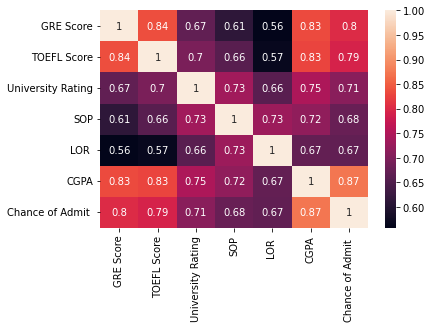

In [27]:
sns.heatmap(cor, annot=True)

In [28]:
cor[['CGPA']].T

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
CGPA,0.83306,0.828417,0.746479,0.718144,0.670211,1.0,0.873289


<AxesSubplot:>

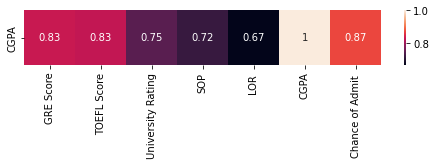

In [29]:
plt.figure(figsize=(8,1))
sns.heatmap(cor[['CGPA']].T, annot=True)

<AxesSubplot:xlabel='GRE Score', ylabel='CGPA'>

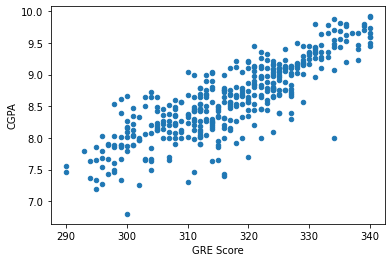

In [30]:
ad_df.plot( x = 'GRE Score', y = 'CGPA', kind='scatter' )

<AxesSubplot:xlabel='TOEFL Score', ylabel='CGPA'>

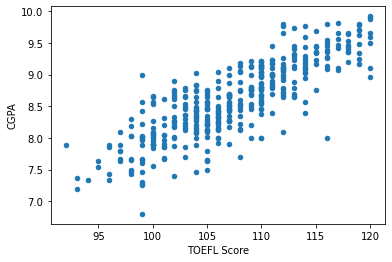

In [31]:
ad_df.plot( x = 'TOEFL Score', y = 'CGPA', kind='scatter' )

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

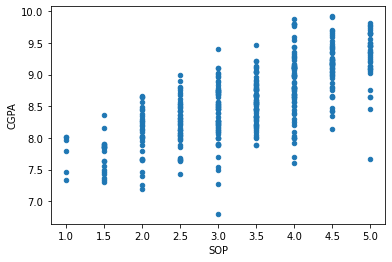

In [32]:
ad_df.plot( x = 'SOP', y = 'CGPA', kind='scatter' )

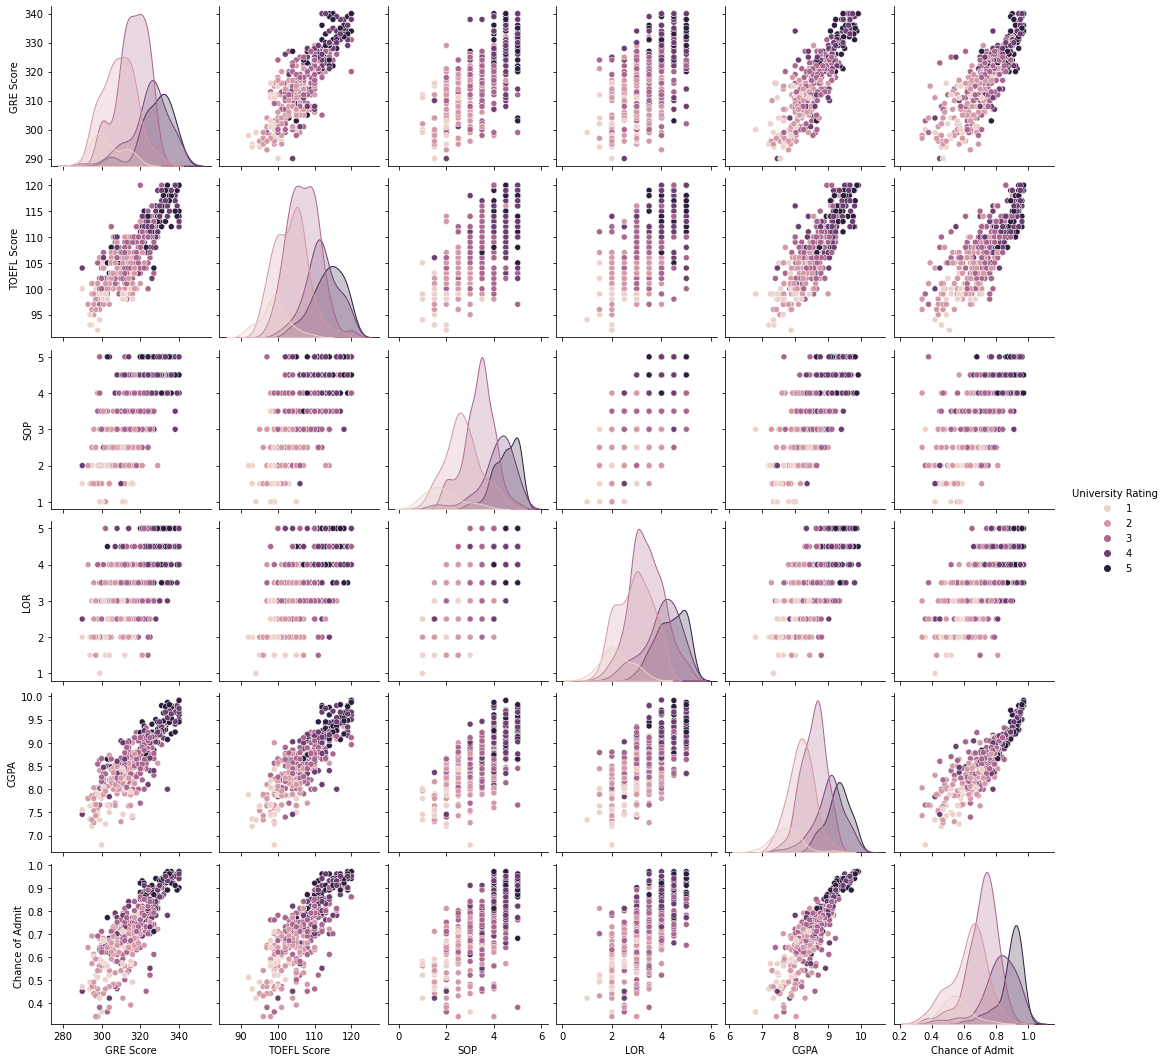

In [33]:
sns.pairplot(ad_df, hue= 'University Rating')

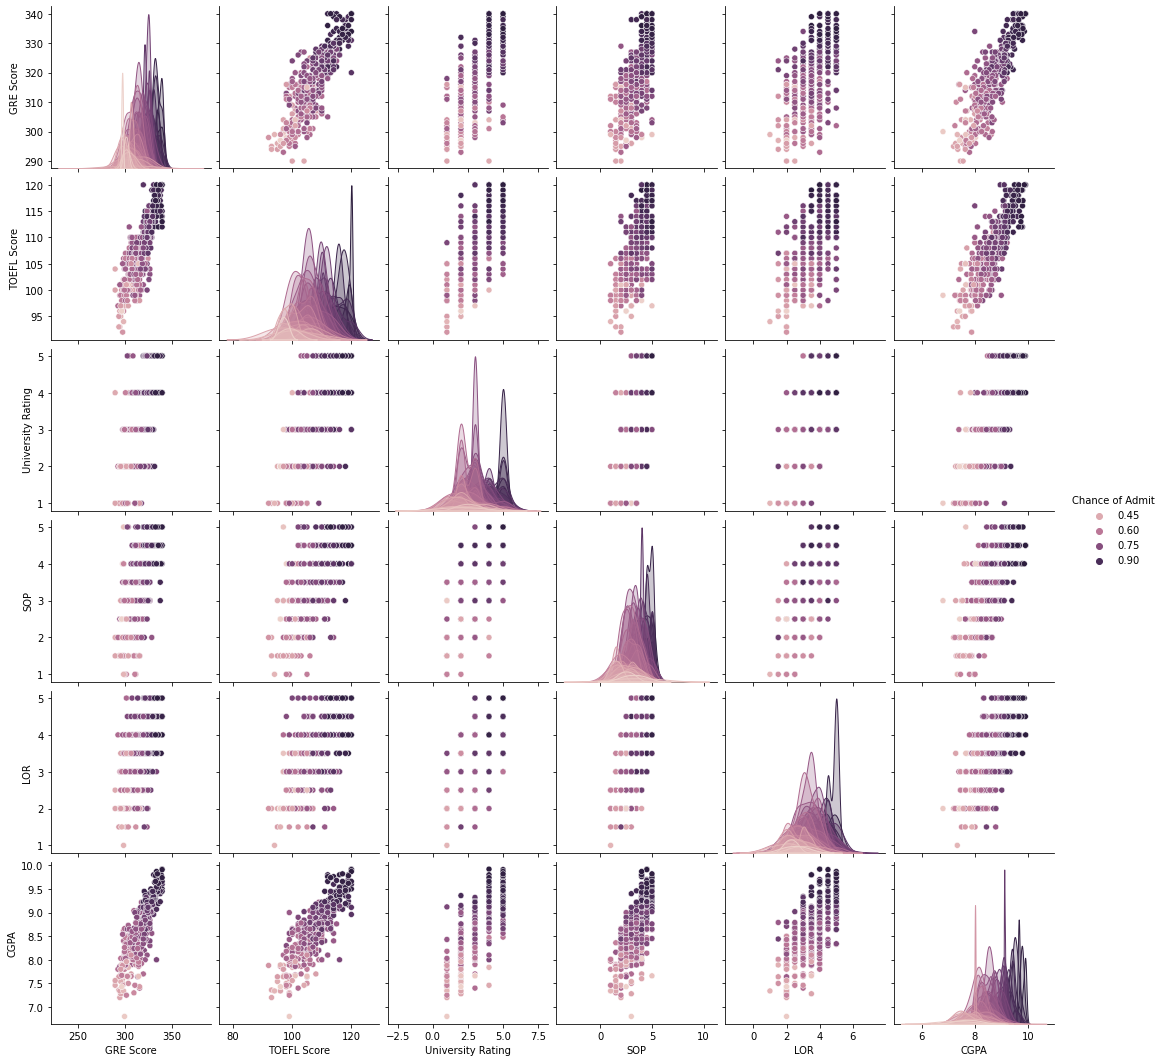

In [34]:
sns.pairplot(ad_df, hue= 'Chance of Admit ')

In [35]:
a_df = ad_df.drop('CGPA',axis=1)
a_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Chance of Admit
0,337,118,4,4.5,4.5,0.92
1,324,107,4,4.0,4.5,0.76
2,316,104,3,3.0,3.5,0.72
3,322,110,3,3.5,2.5,0.80
4,314,103,2,2.0,3.0,0.65
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,0.82
396,325,107,3,3.0,3.5,0.84
397,330,116,4,5.0,4.5,0.91
398,312,103,3,3.5,4.0,0.67


###### 5.2. No Multicolinearity : 
VIF >> Variuance Inflation Factor

In [36]:
vif_list = []

for i in range(0,a_df.shape[1]):
    vif = variance_inflation_factor(a_df.to_numpy(), i)
    vif_list.append(vif)
    
    print(f'VIF for {a_df.columns[i]}:' , vif)

VIF for GRE Score: 1116.3523085256686
VIF for TOEFL Score: 1294.1679749603898
VIF for University Rating: 22.572641532543866
VIF for SOP: 37.01870889162734
VIF for LOR : 39.313634979388134
VIF for Chance of Admit : 78.42452099529058


In [37]:
vif_df = pd.DataFrame()
vif_df['Feature'] = a_df.columns
vif_df['VIF'] = vif_list
vif_df

,Feature,VIF
0,GRE Score,1116.352309
1,TOEFL Score,1294.167975
2,University Rating,22.572642
3,SOP,37.018709
4,LOR,39.313635
5,Chance of Admit,78.424521


<AxesSubplot:>

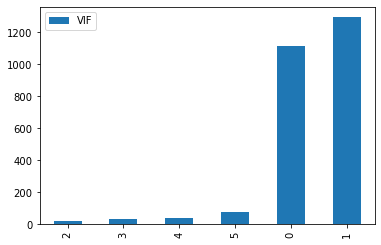

In [38]:
vif_df.sort_values('VIF').plot( kind = 'bar')

<AxesSubplot:>

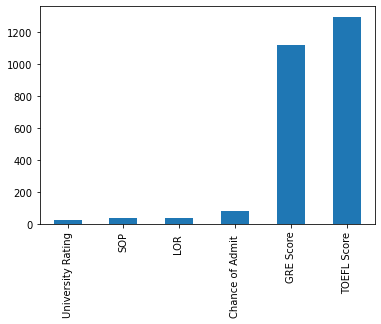

In [39]:
s1 = pd.Series(vif_list, index=a_df.columns)
s1.sort_values().plot(kind='bar')

#### 6.Model Training/Building

In [40]:
x = a_df
y = ad_df['CGPA']
y

0      9.65
1      8.87
2      8.00
3      8.67
4      8.21
       ... 
395    9.04
396    9.11
397    9.45
398    8.78
399    9.66
Name: CGPA, Length: 400, dtype: float64

###### 6.1Train Test Split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Chance of Admit
93,301,97,2,3.0,3.0,0.44
23,334,119,5,5.0,4.5,0.95
299,305,112,3,3.0,3.5,0.71
13,307,109,3,4.0,3.0,0.62
90,318,106,2,4.0,4.0,0.64
...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,0.79
72,321,111,5,5.0,5.0,0.93
396,325,107,3,3.0,3.5,0.84
235,326,111,5,4.5,4.0,0.88


In [42]:
print('X_ Train : ',x_train.shape)
print('X_ Test : ',x_test.shape)
print('Y_ Train : ',y_train.shape)
print('Y_ Test : ',x_test.shape)

X_ Train :  (320, 6)
X_ Test :  (80, 6)
Y_ Train :  (320,)
Y_ Test :  (80, 6)


###### 6.2 Instantiating Linear Regression Model

In [43]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

###### 6.3 Model Training

In [44]:
lin_reg.fit(x_train,y_train)


LinearRegression()

In [45]:
lin_reg.coef_

array([0.01292627, 0.0150208 , 0.05105573, 0.05434828, 0.04002557,
       1.61306066])

In [46]:
lin_reg.intercept_

1.2413204266177145

###### 6.4 Model Evaluation

In [47]:
y_pred_test = lin_reg.predict(x_test)
y_pred_test

array([8.40569783, 8.03558039, 8.96391523, 8.9488362 , 9.06484309,
       8.18667999, 8.41059725, 7.81832169, 7.87026077, 9.49093788,
       9.04304266, 9.51332209, 9.38738927, 8.37228494, 8.68686537,
       8.37137032, 8.98080643, 9.30605839, 7.54942616, 8.43041012,
       8.14592243, 8.74942891, 9.01332177, 9.44254411, 8.49613147,
       7.55340889, 8.65705581, 8.53919397, 9.362959  , 8.34869389,
       9.66337828, 8.22668543, 8.97400253, 8.77751722, 8.71402976,
       8.03997112, 7.48111386, 8.35206537, 9.37336657, 8.62869268,
       9.15331916, 8.28703288, 9.40453868, 8.00437596, 9.60474026,
       8.72674839, 8.72938744, 8.99685428, 8.25089508, 8.23961949,
       8.54640219, 7.87656832, 8.90679457, 8.51102719, 8.56509117,
       9.50096519, 7.45163572, 7.69096232, 8.90555458, 8.99765676,
       9.4102751 , 8.28511153, 9.35934711, 8.52091061, 7.86222536,
       8.96160053, 9.19363973, 8.62211731, 8.29340527, 8.75570823,
       8.94404777, 7.73628092, 8.60906596, 7.99268866, 9.09222

In [48]:
y_test

398    8.78
125    8.66
328    8.77
339    8.66
172    9.13
       ... 
347    7.34
41     8.20
180    8.16
132    8.56
224    8.23
Name: CGPA, Length: 80, dtype: float64

In [49]:
residual = y_test-y_pred_test
residual

398    0.374302
125    0.624420
328   -0.193915
339   -0.288836
172    0.065157
         ...   
347   -0.001145
41     0.168349
180   -0.130100
132    0.016418
224    0.043025
Name: CGPA, Length: 80, dtype: float64

###### 6.5 Evaluation on Testing Data

In [50]:
mse =mean_squared_error(y_test,y_pred_test)
print('Mean Square Error',mse)

rmse = np.sqrt(mse)
print('Root Mean Square Error', rmse)

mae = mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error', mae)

r_sqr = r2_score(y_test, y_pred_test)
print('R2_Score', r_sqr)

adj_r2 = 1 - (((1-r_sqr)*(x_test.shape[0]-1))/(x_test.shape[0]- x_test.shape[1]-1))
print('Adjusted R Squared Value:', adj_r2)

Mean Square Error 0.05699250401034443
Root Mean Square Error 0.2387310285872878
Mean Absolute Error 0.1805265781384499
R2_Score 0.8423716124816079
Adjusted R Squared Value: 0.8294158546033839


###### Evaluation on Training Data

In [51]:
y_pred_train = lin_reg.predict(x_train)
y_pred_train

array([7.68412468, 9.5857122 , 8.46773666, 8.33768683, 8.45604444,
       7.97556132, 8.57582002, 9.58891654, 8.47129227, 8.67440616,
       7.63392313, 8.45958428, 8.75752468, 8.97810488, 7.68798478,
       8.16588602, 8.38202861, 8.70947754, 9.16092909, 9.15121079,
       9.22116542, 7.85834097, 8.35562961, 7.55883146, 8.74583318,
       9.06724646, 8.88627869, 8.08341666, 9.2489645 , 8.54983053,
       8.73405961, 7.46278622, 9.42815091, 8.32170713, 8.46200231,
       7.74125358, 8.46688259, 8.87565655, 8.76460712, 8.88790497,
       8.06579459, 8.23366348, 8.07768024, 8.69159336, 8.8267243 ,
       7.7918979 , 9.57247905, 9.02338466, 8.51856034, 9.47167582,
       8.58862121, 8.14006498, 8.29505596, 9.28456187, 8.32452863,
       8.30312915, 8.49259805, 8.68435575, 8.10394708, 7.38889302,
       8.23095758, 8.50618053, 8.31230033, 8.95490087, 8.72265014,
       8.00343368, 8.22292626, 8.22809187, 9.23009001, 8.50143034,
       8.56490936, 9.48284852, 8.64199665, 9.25840245, 9.09220

In [52]:
mse =mean_squared_error(y_train,y_pred_train)
print('Mean Square Error',mse)

rmse = np.sqrt(mse)
print('Root Mean Square Error', rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error', mae)

r_sqr_train = r2_score(y_train,y_pred_train)
print('R2_Score', r_sqr_train)

adj_r2_train = 1 - (((1-r_sqr_train)*(x_test.shape[0]-1))/(x_test.shape[0]- x_test.shape[1]-1))
print('Adjusted R Squared Value:', adj_r2_train)

Mean Square Error 0.05457465823736378
Root Mean Square Error 0.23361219625131685
Mean Absolute Error 0.17790880776646026
R2_Score 0.8453931371813966
Adjusted R Squared Value: 0.8326857237990457


In [53]:
print(r_sqr, r_sqr_train)

0.8423716124816079 0.8453931371813966


In [54]:
print(adj_r2,adj_r2_train)

0.8294158546033839 0.8326857237990457


##### Future Value Prediction

In [55]:
lin_reg.predict([[300,106,2,3.13,4.5,0.8]])

array([8.45419109])

### Model Dump

In [60]:
columns_data = {'columns':['GRE','TOEFL','Rating','SOP','LOR','Admit']
               }
columns_data

{'columns': ['GRE', 'TOEFL', 'Rating', 'SOP', 'LOR', 'Admit']}

In [61]:
pickle.dump(lin_reg, open('cgpa.pkl', 'wb'))


In [62]:
json.dump(columns_data, open('data_cgpa.json','w'))

In [57]:
with open ('cgpa_data.json','w') as f :
    json.dump(cgpa_data,f)

NameError: name 'cgpa_data' is not defined